In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [2]:
#mtcnn required
!pip install mtcnn

In [3]:
from mtcnn import MTCNN

In [4]:
# Create an instance of the MTCNN model to detect faces in images.
# MTCNN is a popular tool for face detection and will help us find faces in photos or videos.
model = MTCNN()


The imported picture contains 3 persons.


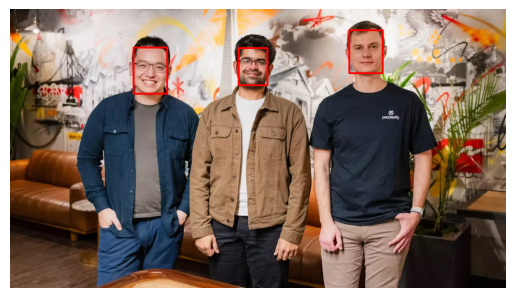

<Figure size 640x480 with 0 Axes>

In [19]:
def detect_faces_from_path(image_path):
    # Step 1: Read the image from the local path using OpenCV
    img = cv2.imread(image_path)

    # Convert the image from BGR to RGB (MTCNN expects RGB images)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Step 2: Initialize the MTCNN model
    model = MTCNN()

    # Step 3: Detect faces in the image
    result = model.detect_faces(img_rgb)

    # Step 4: Display number of faces detected
    print(f"The imported picture contains {len(result)} persons.")

    # Step 5: Draw bounding boxes around detected faces
    def show_faces(result):
        for i in range(len(result)):
            x1, y1, width, height = result[i]['box']
            x1, y1 = abs(x1), abs(y1)
            x2, y2 = x1 + width, y1 + height
            img_with_faces = cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 5)  # Red rectangles
        return img_with_faces

    # Call show_faces function to draw rectangles around detected faces
    img_with_faces = show_faces(result)

    # Step 6: Convert image from BGR (OpenCV) to RGB (for displaying with matplotlib)
    img_with_faces_rgb = cv2.cvtColor(img_with_faces, cv2.COLOR_BGR2RGB)

    # Step 7: Display the result using matplotlib
    plt.imshow(img_with_faces_rgb)
    plt.axis('off')  # Hide axes for a cleaner image display
    plt.show()

    # Optionally, save the image as 'result.png'
    plt.savefig('result.png', bbox_inches='tight')

# Example usage:
image_path = "/content/Image 4.jpg"  # Replace with the path to your local image
detect_faces_from_path(image_path)